In [1]:
!pip install pycaret

     |████████████████████████████████| 264 kB 28.2 MB/s 
     |████████████████████████████████| 14.4 MB 63 kB/s 
     |████████████████████████████████| 2.0 MB 43.4 MB/s 
     |████████████████████████████████| 271 kB 44.7 MB/s 
     |████████████████████████████████| 105 kB 54.2 MB/s 
     |████████████████████████████████| 6.8 MB 36.0 MB/s 
     |████████████████████████████████| 80 kB 10.4 MB/s 
     |████████████████████████████████| 1.7 MB 47.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 1.3 MB 17.8 MB/s 
     |████████████████████████████████| 248 kB 71.3 MB/s 
     |████████████████████████████████| 167 kB 59.5 MB/s 
     |████████████████████████████████| 62 kB 40 kB/s 
     |████████████████████████████████| 636 kB 41.0 MB/s 
     |████████████████████

In [2]:
from pycaret.classification import *
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLOps/creditcard.csv')

In [4]:
data_drop = df.sample(frac=0.9, random_state=42)
df = df.drop(index = data_drop.index)
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
15,12.0,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,0.747731,-0.793981,-0.770407,1.047627,-1.066604,1.106953,1.660114,-0.279265,-0.419994,0.432535,0.263451,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [5]:
data_unseen = df.sample(frac=0.1, random_state=42)
df = df.drop(index = data_unseen.index)

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Model Training & Validation: ' + str(df.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Model Training & Validation: (25633, 31)
Unseen Data For Predictions: (2848, 31)


In [ ]:
expt_basic = setup(
    data = df,
    target = 'Class',
    train_size = 0.8,
    normalize = True,
    normalize_method = 'zscore',
    numeric_imputation = 'median',
    categorical_imputation = 'mode'
)

In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
top5 = compare_models(sort = "F1", n_select = 5, fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9994,0.9124,0.800,0.8734,0.8311,0.8308,0.8336,0.110
et,Extra Trees Classifier,0.9993,0.9735,0.700,0.9350,0.7948,0.7945,0.8057,0.998
gbc,Gradient Boosting Classifier,0.9991,0.9679,0.800,0.7764,0.7828,0.7823,0.7851,15.202
rf,Random Forest Classifier,0.9992,0.9485,0.700,0.8889,0.7757,0.7753,0.7846,3.920
dt,Decision Tree Classifier,0.9989,0.8747,0.750,0.7201,0.7307,0.7302,0.7323,0.356
ada,Ada Boost Classifier,0.9991,0.9407,0.650,0.8756,0.7242,0.7238,0.7423,3.088
knn,K Neighbors Classifier,0.9990,0.9247,0.600,0.8500,0.6943,0.6938,0.7089,7.396
svm,SVM - Linear Kernel,0.9988,0.0000,0.600,0.7643,0.6677,0.6671,0.6743,0.080
lr,Logistic Regression,0.9988,0.9575,0.600,0.7314,0.6564,0.6558,0.6604,0.708
lightgbm,Light Gradient Boosting Machine,0.9970,0.7618,0.575,0.5819,0.5659,0.5648,0.5706,0.748


In [9]:
tuned_models = []
for model in top5:
    tuned_models.append(tune_model(model, optimize = 'F1', fold = 5))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.8749,0.7500,0.7500,0.7500,0.7495,0.7495
1,0.9998,0.9375,0.8750,1.0000,0.9333,0.9332,0.9353
2,0.9995,0.8750,0.7500,1.0000,0.8571,0.8569,0.8658
3,0.9990,0.6874,0.6250,0.8333,0.7143,0.7138,0.7212
4,0.9993,0.7500,0.6250,1.0000,0.7692,0.7689,0.7903
Mean,0.9993,0.8250,0.7250,0.9167,0.8048,0.8045,0.8124
SD,0.0003,0.0919,0.0935,0.1054,0.0797,0.0798,0.0784


In [10]:
for model in tuned_models:
    print(model)    

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.9,
                           solver='lsqr', store_covariance=False, tol=0.0001)
ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=8, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0002,
                     min_impurity_split=None, min_samples_leaf=5,
                     min_samples_split=5, min_weight_fraction_leaf=0.0,
                     n_estimators=50, n_jobs=-1, oob_score=False,
                     random_state=4102, verbose=0, warm_start=False)
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
  

In [11]:
blended_model = blend_models(estimator_list=[model for model in tuned_models])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9990,0.8610,0.75,0.7500,0.7500,0.7495,0.7495
1,0.9990,0.9984,0.75,0.7500,0.7500,0.7495,0.7495
2,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000
3,0.9995,0.9991,0.75,1.0000,0.8571,0.8569,0.8658
4,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000
5,0.9990,0.9752,0.50,1.0000,0.6667,0.6662,0.7068
6,0.9990,0.8562,0.75,0.7500,0.7500,0.7495,0.7495
7,0.9995,1.0000,1.00,0.8000,0.8889,0.8886,0.8942
8,0.9995,1.0000,0.75,1.0000,0.8571,0.8569,0.8658
9,0.9990,0.9996,0.75,0.7500,0.7500,0.7495,0.7495


In [12]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9998,0.9969,0.9,1.0,0.9474,0.9473,0.9486


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,-0.351283,0.654248,-0.643596,1.076896,0.002521,-1.501455,0.173460,-1.239843,0.188332,0.706504,0.231984,-1.527726,0.444365,0.051293,-1.339300,-1.874891,-2.276098,0.919392,0.817190,-0.116939,-0.624707,-0.778080,-0.882644,0.121175,0.754887,0.281143,2.214412,0.059774,0.067811,-0.279384,0,0,0.9995
1,0.683060,-0.354245,-0.122286,0.156978,-0.398870,1.019451,0.087517,0.597885,0.064234,0.410797,-0.134040,-0.382630,-0.544493,-1.702322,0.275457,0.745658,-1.168503,0.546871,-2.393489,-1.428549,-0.357037,-0.388290,-0.357258,1.227241,-1.692145,-1.251884,0.462660,0.208809,-0.693531,-0.282971,0,0,0.9995
2,1.387801,0.971067,-0.263773,-0.157015,0.295021,-0.589771,-0.375281,-0.470722,0.058492,0.998194,0.019191,0.840768,0.937406,-0.593188,0.292942,0.007126,0.456235,-0.868128,0.399587,0.210528,-0.257009,-0.163337,-0.420086,0.574366,0.031113,-0.938249,-1.337943,0.054359,-0.120591,-0.208379,0,0,0.9995
3,0.083739,-0.491545,0.904447,0.415228,-0.402498,-0.113685,-0.605213,0.021571,0.284877,1.651729,-1.401711,0.411714,-2.016680,2.347082,0.042912,-0.404865,0.687385,1.503772,0.575999,-0.821202,0.037752,-0.549290,-1.055506,0.047768,-0.324056,-0.215642,-0.615090,0.282325,0.305775,-0.309718,0,0,0.9995
4,-0.527437,-0.502174,0.646400,0.927776,0.087019,-0.055631,-0.093607,0.435201,0.209383,-0.097128,-0.403127,-0.564440,0.578921,0.430460,-0.215007,-0.255037,-0.797652,0.430575,-1.247512,0.030126,0.040972,-0.211438,-0.162394,-0.212091,0.215014,-0.162907,0.468393,-0.167088,-0.453862,-0.241235,0,0,0.9995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,-0.300092,-1.384726,0.705362,-0.764506,0.252179,-4.002808,3.169147,-3.212320,-11.547637,-1.757172,-2.251831,-1.253955,1.024055,-0.952649,1.622854,-0.303337,-1.078919,1.756721,1.048650,-0.436420,2.056364,-10.144499,1.414750,-4.835883,1.125698,0.012256,2.777410,2.279017,-0.079519,3.462707,0,0,0.9995
5123,1.624886,1.070290,-0.489719,-0.381201,0.296308,-0.472824,0.438061,-0.960402,0.198548,-0.004167,1.085373,-0.689719,-0.148809,-0.629219,0.033724,-0.437753,-0.923545,-1.015295,2.922457,-0.934999,-0.860465,-0.212396,0.283441,0.082141,-1.921237,-0.062544,-0.889794,0.194104,-0.166940,-0.300482,0,0,0.9995
5124,-0.638366,0.339760,-0.338411,0.635221,1.892737,-0.291354,1.136116,-0.332002,0.353702,-0.062245,0.415442,0.235827,0.994102,0.290828,-0.372001,-1.446735,0.534433,-0.514258,-0.207765,-0.602520,0.371850,-0.040669,-0.503016,-0.321872,-1.069042,0.462143,-0.128072,0.032057,0.169551,0.483761,0,0,0.9995
5125,-1.066497,0.527420,-0.823271,0.759070,-0.266903,-1.588517,-0.365416,-0.984430,0.066519,0.005846,0.556801,-0.859284,-1.018011,-1.049489,-0.059429,1.877141,-0.586844,-0.314498,2.185339,-1.485161,-0.267412,-0.120232,-0.254695,-0.071493,0.632572,-0.283600,2.273662,-0.111707,0.166539,0.288721,0,0,0.9995


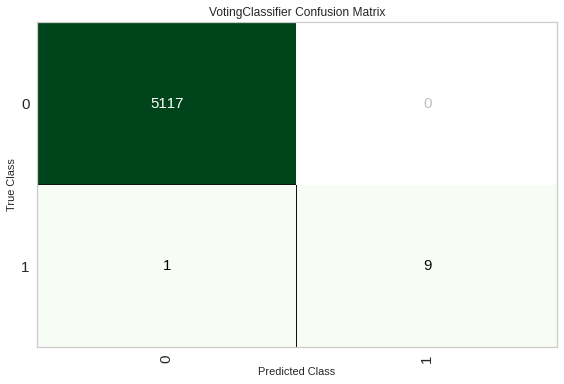

In [13]:
plot_model(blended_model, plot = 'confusion_matrix')

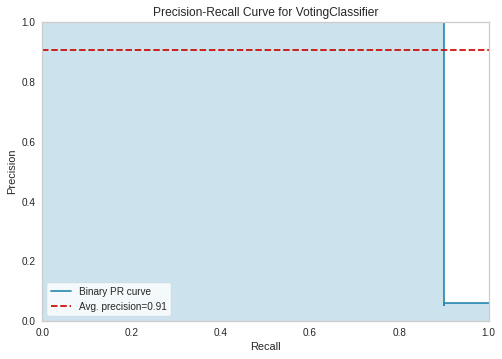

In [14]:
plot_model(blended_model, plot = 'pr')

In [15]:
unseen_predictions = predict_model(blended_model, data = data_unseen)
unseen_predictions.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,123831.0,1.45808,-0.93026,-2.365379,0.447669,0.381869,-0.278734,0.504830,-0.242197,0.927372,-1.017249,-0.970889,0.408786,0.688849,-1.551976,-0.018889,0.163556,0.830182,0.174708,0.223895,0.549018,-0.092675,-0.719976,-0.146016,-0.058131,-0.061501,-0.112025,-0.065275,0.034866,327.81,0,0,0.9995
1,149577.0,-1.33193,0.56095,0.877326,-0.588652,-0.093342,-0.070838,-0.049653,0.353475,0.294565,-0.708150,-1.241115,0.523161,1.062728,-0.357822,-0.103717,0.384171,-0.520745,0.170531,-0.309921,-0.338214,0.335789,1.054198,0.002055,0.831298,-0.303967,0.522704,-0.327014,0.106332,29.90,0,0,0.9995


In [16]:
from pycaret.utils import check_metric
print('Accuracy: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Accuracy')))
print('Precision: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Precision')))
print('Recall: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'Recall')))
print('F1: {}'.format(check_metric(unseen_predictions.Class, unseen_predictions.Label, 'F1')))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [17]:
save_model(blended_model, 'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=2,
          